Epoch 1/5
750/750 [==============================] - 71s 91ms/step - loss: 0.3975 - accuracy: 0.8763 - val_loss: 0.0790 - val_accuracy: 0.9769
Epoch 2/5
750/750 [==============================] - 66s 88ms/step - loss: 0.1472 - accuracy: 0.9566 - val_loss: 0.0630 - val_accuracy: 0.9831
Epoch 3/5
750/750 [==============================] - 60s 80ms/step - loss: 0.1098 - accuracy: 0.9674 - val_loss: 0.0493 - val_accuracy: 0.9866
Epoch 4/5
750/750 [==============================] - 60s 80ms/step - loss: 0.0953 - accuracy: 0.9725 - val_loss: 0.0449 - val_accuracy: 0.9865
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 0.0306 - accuracy: 0.9903

Test accuracy: 0.9903
Test loss: 0.0306


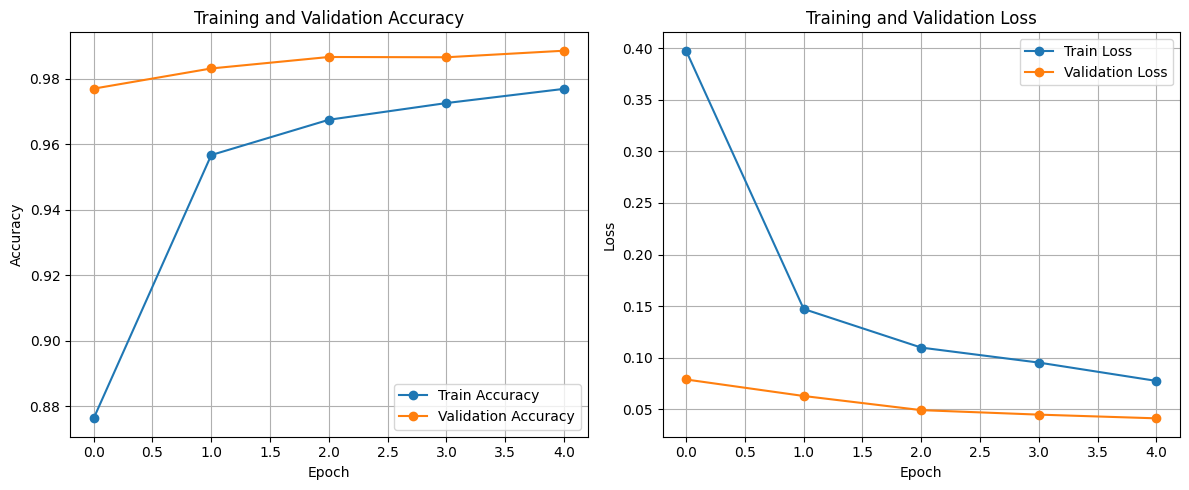

313/313 [==============================] - 5s 15ms/step


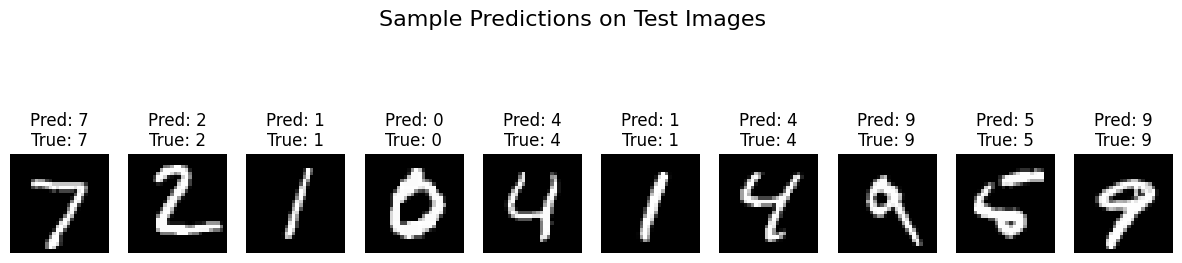

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2)


test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
num_samples = 10
plt.figure(figsize=(15, 4))
plt.suptitle("Sample Predictions on Test Images", fontsize=16)


for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {test_labels[i]}")
    plt.axis('off')

plt.show()